In [1]:
# import the required libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

C:\Users\Admin\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
tweet_df = pd.read_csv('C:\\Users\\Admin\\Downloads\\twitter_data.csv')

In [3]:
tweet_df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [20]:
tweet_df["labels"] = tweet_df['class'].map({0: "Hate Speech", 1: "Offensive Speech", 2: "No Hate and Offensive Speech"})
tweet_df = tweet_df[["tweet", "labels"]]

In [21]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24698 entries, 0 to 24782
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   24698 non-null  object
 1   labels  24698 non-null  object
dtypes: object(2)
memory usage: 578.9+ KB


In [22]:
# printing random tweets 
print(tweet_df['tweet'].iloc[0],"\n")
print(tweet_df['tweet'].iloc[1],"\n")
print(tweet_df['tweet'].iloc[2],"\n")
print(tweet_df['tweet'].iloc[3],"\n")
print(tweet_df['tweet'].iloc[4],"\n")

rt mayasolovely woman shouldnt complain cleaning house amp man always take trash 

rt mleew17 boy dats coldtyga dwn bad cuffin dat hoe 1st place 

rt urkindofbrand dawg rt 80sbaby4life ever fuck bitch start cry confused shit 

rt c_g_anderson viva_based look like tranny 

rt shenikaroberts shit hear might true might faker bitch told ya 57361 



In [23]:
#creating a function to process the data
def data_processing(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"https\S+|www\S+http\S+", '', tweet, flags = re.MULTILINE)
    tweet = re.sub(r'\@w+|\#','', tweet)
    tweet = re.sub(r'[^\w\s]','',tweet)
    tweet = re.sub(r'ð','',tweet)
    tweet_tokens = word_tokenize(tweet)
    filtered_tweets = [w for w in tweet_tokens if not w in stop_words]
    return " ".join(filtered_tweets)

In [24]:
import nltk
nltk.download('punkt')
tweet_df.tweet = tweet_df['tweet'].apply(data_processing)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [25]:
tweet_df = tweet_df.drop_duplicates('tweet')

In [26]:
lemmatizer = WordNetLemmatizer()
def lemmatizing(data):
    tweet = [lemmatizer.lemmatize(word) for word in data]
    return data

In [27]:
nltk.download('wordnet')
tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: lemmatizing(x))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [28]:
# printing the data to see the effect of preprocessing
print(tweet_df['tweet'].iloc[0],"\n")
print(tweet_df['tweet'].iloc[1],"\n")
print(tweet_df['tweet'].iloc[2],"\n")
print(tweet_df['tweet'].iloc[3],"\n")
print(tweet_df['tweet'].iloc[4],"\n")

rt mayasolovely woman shouldnt complain cleaning house amp man always take trash 

rt mleew17 boy dats coldtyga dwn bad cuffin dat hoe 1st place 

rt urkindofbrand dawg rt 80sbaby4life ever fuck bitch start cry confused shit 

rt c_g_anderson viva_based look like tranny 

rt shenikaroberts shit hear might true might faker bitch told ya 57361 



In [29]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24698 entries, 0 to 24782
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   24698 non-null  object
 1   labels  24698 non-null  object
dtypes: object(2)
memory usage: 578.9+ KB


In [30]:
tweet_df['labels'].value_counts()

Offensive Speech                19111
No Hate and Offensive Speech     4160
Hate Speech                      1427
Name: labels, dtype: int64

### Data visualization 

<AxesSubplot:xlabel='labels', ylabel='count'>

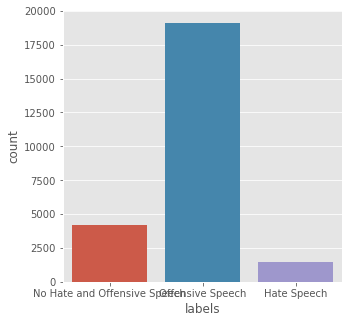

In [32]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='labels', data = tweet_df)

Text(0.5, 1.0, 'Distribution of sentiments')

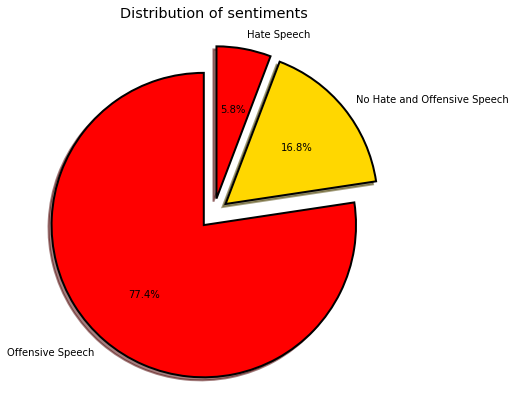

In [35]:
fig = plt.figure(figsize=(7,7))
colors = ("red", "gold")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = tweet_df['labels'].value_counts()
explode = (0.1, 0.1, 0.1)
tags.plot(kind='pie',autopct = '%1.1f%%', shadow=True, colors = colors, startangle =90, 
         wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [36]:
non_hate_tweets = tweet_df[tweet_df.labels == 'No Hate and Offensive Speech']
non_hate_tweets.head()

,tweet,labels
0,rt mayasolovely woman shouldnt complain cleani...,No Hate and Offensive Speech
40,momma said pussy cats inside doghouse,No Hate and Offensive Speech
63,addicted2guys simplyaddictedtoguys httptco1jl4...,No Hate and Offensive Speech
66,allaboutmanfeet httptco3gzupfumev woof woof ho...,No Hate and Offensive Speech
67,allyhaaaaa lemmie eat oreo amp dishes one oreo...,No Hate and Offensive Speech


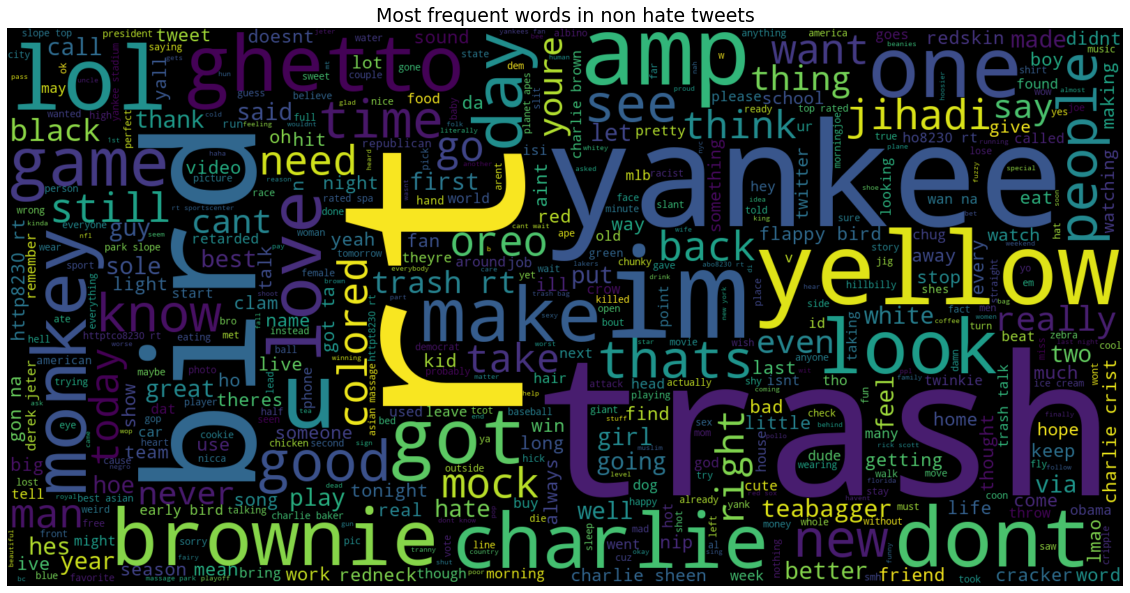

In [40]:
text = ' '.join([word for word in non_hate_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
print(wordcloud)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in non hate tweets', fontsize = 19)
plt.show()

In [43]:
neg_tweets = tweet_df[(tweet_df.labels == 'Hate Speech') | (tweet_df.labels == 'Offensive Speech')]
neg_tweets.head()

,tweet,labels
1,rt mleew17 boy dats coldtyga dwn bad cuffin da...,Offensive Speech
2,rt urkindofbrand dawg rt 80sbaby4life ever fuc...,Offensive Speech
3,rt c_g_anderson viva_based look like tranny,Offensive Speech
4,rt shenikaroberts shit hear might true might f...,Offensive Speech
5,t_madison_x shit blows meclaim faithful somebo...,Offensive Speech


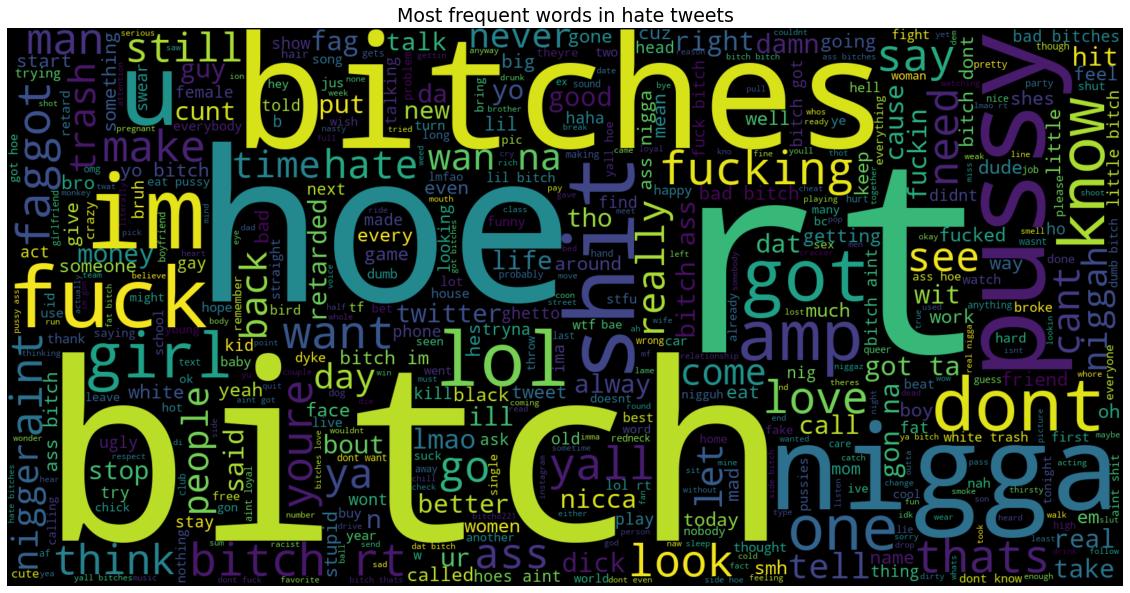

In [44]:
text = ' '.join([word for word in neg_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in hate tweets', fontsize = 19)
plt.show()

In [45]:
vect = TfidfVectorizer(ngram_range=(1,2)).fit(tweet_df['tweet'])

In [46]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features: \n{}".format(feature_names[:20]))

Number of features: 189343

First 20 features: 
['007', '007 httptcoon5t60rmfb', '007beardownjedi', '007beardownjedi afl', '007hertzrumble', '007hertzrumble httptcoqyn1bc7mxs', '007m_h', '007m_h lilduval', '00_jackie', '00_jackie darknight420', '00_jackie wan', '00sexilexi00', '00sexilexi00 bitch', '00sexilexi00 freeze', '00sexilexi00 httptcop3heuboqbu', '00sexilexi00 nigga', '00sexilexi00 socass_', '00sexilexi00 swiggety', '01', '01 going']


In [47]:
vect = TfidfVectorizer(ngram_range=(1,3)).fit(tweet_df['tweet'])

In [48]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features: \n{}".format(feature_names[:20]))

Number of features: 355237

First 20 features: 
['007', '007 httptcoon5t60rmfb', '007beardownjedi', '007beardownjedi afl', '007beardownjedi afl american', '007hertzrumble', '007hertzrumble httptcoqyn1bc7mxs', '007hertzrumble httptcoqyn1bc7mxs via', '007m_h', '007m_h lilduval', '007m_h lilduval damn', '00_jackie', '00_jackie darknight420', '00_jackie darknight420 allahthefairy', '00_jackie wan', '00_jackie wan na', '00sexilexi00', '00sexilexi00 bitch', '00sexilexi00 bitch ass', '00sexilexi00 freeze']


## Model Building

In [49]:
X = tweet_df['tweet']
Y = tweet_df['labels']
X = vect.transform(X)

In [50]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [51]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train: (19758, 355237)
Size of y_train: (19758,)
Size of x_test:  (4940, 355237)
Size of y_test:  (4940,)


In [52]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_predict = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_predict, y_test)
print("Test accuarcy: {:.2f}%".format(logreg_acc*100))

Test accuarcy: 84.62%


In [53]:
print(confusion_matrix(y_test, logreg_predict))
print("\n")
print(classification_report(y_test, logreg_predict))

[[  11    8  264]
 [   1  419  443]
 [   7   37 3750]]


                              precision    recall  f1-score   support

                 Hate Speech       0.58      0.04      0.07       283
No Hate and Offensive Speech       0.90      0.49      0.63       863
            Offensive Speech       0.84      0.99      0.91      3794

                    accuracy                           0.85      4940
                   macro avg       0.77      0.50      0.54      4940
                weighted avg       0.84      0.85      0.81      4940



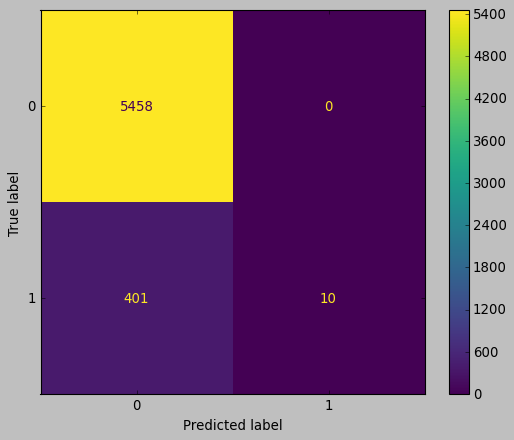

In [44]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_predict, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()

In [62]:
# Specify the string you want to classify
new_text = "good"

# Vectorize the new text using the same vectorizer used during training
new_text_vectorized = vect.transform([new_text])

# Predict the label for the new text
prediction = logreg.predict(new_text_vectorized)

# Predict the probability scores for each class (if needed)
probabilities = logreg.predict_proba(new_text_vectorized)

# Print the predicted label and probability scores
print("Predicted Label:", prediction[0])

# If you want to print the probability scores for each class
print("Probability Scores:", probabilities[0])

Predicted Label: Offensive Speech
Probability Scores: [0.0329946  0.26337216 0.70363324]


In [54]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [55]:
param_grid = {'C':[100, 10, 1.0, 0.1, 0.01], 'solver' :['newton-cg', 'lbfgs','liblinear']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
grid.fit(x_train, y_train)
print("Best Cross validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best Cross validation score: 0.88
Best parameters:  {'C': 100, 'solver': 'lbfgs'}


In [56]:
y_pred = grid.predict(x_test)

In [57]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 88.72%


In [58]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[  34   20  229]
 [   1  657  205]
 [  26   76 3692]]


                              precision    recall  f1-score   support

                 Hate Speech       0.56      0.12      0.20       283
No Hate and Offensive Speech       0.87      0.76      0.81       863
            Offensive Speech       0.89      0.97      0.93      3794

                    accuracy                           0.89      4940
                   macro avg       0.77      0.62      0.65      4940
                weighted avg       0.87      0.89      0.87      4940

